In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


In [2]:
df_train = pd.read_csv("salju_train.csv")
df_train.head()

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,1,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,NaN,WSW,0.0,13.0,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
1,2,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,SW,WNW,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2,3,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,SE,SE,15.0,26.0,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,Tidak,Tidak
3,4,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,N,SW,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,5,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,NNW,ESE,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak


#Cleansing Data

In [3]:
df_train = df_train.drop(["Tanggal","KodeLokasi","SuhuMin","SuhuMax", "Penguapan", "ArahAnginTerkencang", "KecepatanAnginTerkencang", "ArahAngin9am", "ArahAngin3pm", "KecepatanAngin9am", "KecepatanAngin3pm",
              "Kelembaban9am", "Kelembaban3pm", "Tekanan9am", "Tekanan3pm", "Awan9am", "Suhu9am", "BersaljuHariIni","BersaljuBesok"], axis = 1)


In [4]:
df_train['Suhu3pm'] = df_train['Suhu3pm'].fillna(df_train['Suhu3pm'].mean())
df_train['Hujan'] = df_train['Hujan'].fillna(df_train['Hujan'].mean())
df_train['SinarMatahari'] = df_train['SinarMatahari'].fillna(df_train['SinarMatahari'].mean())
df_train['Awan3pm'] = df_train['Awan3pm'].fillna(df_train['Awan3pm'].mean())
df_train.head()

,id,Hujan,SinarMatahari,Awan3pm,Suhu3pm
0,1,4.8,7.599527,4.51614,15.0
1,2,8.0,7.400000,5.00000,15.5
2,3,0.0,7.599527,4.51614,29.6
3,4,0.0,10.400000,7.00000,23.2
4,5,0.0,12.600000,6.00000,18.1


#Preposition data

In [5]:
scaler = MinMaxScaler()
df_train = df_train.copy()
df_train[
    ['Suhu3pm','Hujan','SinarMatahari','Awan3pm']
] = scaler.fit_transform(df_train[
    ['Suhu3pm','Hujan','SinarMatahari','Awan3pm']
])
df_train = df_train

#Looking for the best K

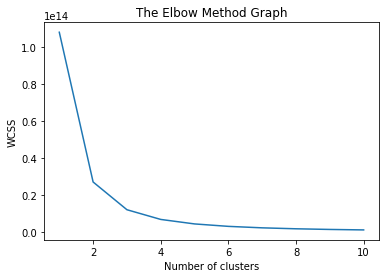

In [6]:
wcss=[]

for i in range(1,11): 
     kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 ) 
     kmeans.fit(df_train)
     wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#Data Centroid


In [7]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [8]:
class KMeansClustering:
    def __init__ (self, K= 3, max_iters= 100, plot_steps= False):
        self.K = K  
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of lists containing the required number of clusters
        self.clusters = [[] for _ in range(self.K)]
        # mean feature vector for each cluster
        self.centroids = []

    # Function to predict the clusters for each datapoint
    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # randomly initialising initial centroids
        random_sample_indices = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[index] for index in random_sample_indices]


        # getting the optimal location of the centroids
        for _ in range(self.max_iters):
            # updating clusters
            self.clusters = self._create_clusters(self.centroids)
            if self.plot_steps:
                self.plot()
            # updating centroids 
            centroids_old = self.centroids
            if self.plot_steps:
                self.plot()
            self.centroids = self._get_centroids(self.clusters)
            # checking for convergence
            if self._is_converged(centroids_old, self.centroids):
                break

        #return cluster labels 
        return self._get_cluster_labels(self.clusters)
    
    # helper function to get the labels for each cluster
    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_index, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_index
        return labels
    # helper function to create clusters
    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for index, sample in enumerate(self.X):
            centroid_index = self._closest_centroid(sample, centroids)
            clusters[centroid_index].append(index)
        return clusters
    
    # helper function which finds the nearest centroid for each data point
    # uses Euclidean distance
    def _closest_centroid(self, sample, centroids):
         distances = [euclidean_distance(sample, point) for point in centroids]
         closes_index = np.argmin(distances)
         return closes_index

    # helper function to get the centroids of the created clusters    
    def _get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_index, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis= 0)
            centroids[cluster_index] = cluster_mean
        return centroids 
    
    # function that checks whether the centoroids change after each round of iteration
    def _is_converged(self, centroids_old, centroids):
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0
    
    # function to plot the final clusters
    def plot(self):
        fig, ax = plt.subplots(figsize= (8, 6))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker= "x", color= 'black', linewidth= 2)
        
        plt.show()

In [9]:
df_train = df_train.head(2000)
kmeans = KMeansClustering(K= 3)
df_train = df_train.iloc[:, 3:].to_numpy()
df_train.shape

(2000, 2)

In [10]:
kmeans = KMeansClustering(K= 3)
kmeans.predict(df_train)

array([1., 1., 1., ..., 1., 2., 0.])

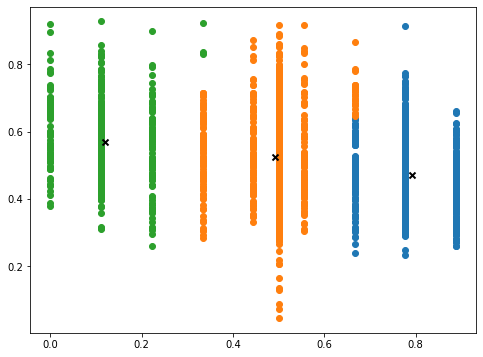

In [11]:
kmeans.plot()